In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob

In [2]:
cd data


D:\Trading\porfolio optimization\data


In [3]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [4]:
all_filenames

['bajajholdings.csv',
 'equitas.csv',
 'granules.csv',
 'gujalkali.csv',
 'itc.csv',
 'jppower.csv',
 'nam-india.csv',
 'nitinspinners.csv',
 'shardacrop.csv',
 'tatastl.csv',
 'tata_power.csv']

In [5]:
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ], axis = 1)

In [6]:
df = combined_csv['Close Price']

In [7]:
df.columns = ['BAJAJHLDNS', 'EQUITAS', 'GRANULES','GUJALKALI', 'ITC', 'JPPOW', 'NAM', 'NITINSP', 'SHARDACROP', 'TATASTL', 'TATAPOW']

In [8]:
df['Date'] = combined_csv['Date'].iloc[:, 1]

c:\users\k_anu\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

c:\users\k_anu\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df.set_index('Date', inplace = True)

In [11]:
df.head()

,BAJAJHLDNS,EQUITAS,GRANULES,GUJALKALI,ITC,JPPOW,NAM,NITINSP,SHARDACROP,TATASTL,TATAPOW
Date,,,,,,,,,,,
2020-05-04,1892.60,47.50,161.90,342.50,174.05,0.75,236.10,30.8,151.45,16.70,30.1
2020-05-05,1890.75,47.80,158.75,335.35,173.90,0.70,232.15,31.0,147.75,16.75,30.5
2020-05-06,1898.10,51.05,158.40,330.05,163.90,0.75,231.35,30.7,146.50,17.05,29.0
2020-05-07,1897.80,50.40,159.25,330.95,161.00,0.75,234.10,30.6,145.30,17.00,29.0
2020-05-08,1876.95,49.30,157.85,326.05,158.25,0.75,240.70,29.7,139.70,16.80,28.5


In [12]:
df.pct_change(1).mean()

BAJAJHLDNS    0.002604
EQUITAS       0.002694
GRANULES      0.003343
GUJALKALI     0.001110
ITC           0.000773
JPPOW         0.006700
NAM           0.001707
NITINSP       0.004762
SHARDACROP    0.003113
TATASTL       0.006260
TATAPOW       0.005177
dtype: float64

In [13]:
df.pct_change(1).corr()

,BAJAJHLDNS,EQUITAS,GRANULES,GUJALKALI,ITC,JPPOW,NAM,NITINSP,SHARDACROP,TATASTL,TATAPOW
BAJAJHLDNS,1.000000,0.404715,0.021226,0.200232,0.092288,0.047940,0.320421,0.266866,0.212637,0.296749,0.280914
EQUITAS,0.404715,1.000000,0.222899,0.321389,0.158198,0.166575,0.327651,0.305048,0.180880,0.332522,0.387201
GRANULES,0.021226,0.222899,1.000000,0.117672,0.090486,0.095959,0.154775,0.102735,0.234831,0.186371,0.257618
GUJALKALI,0.200232,0.321389,0.117672,1.000000,0.128150,0.055528,0.266159,0.181182,0.157271,0.269072,0.275476
ITC,0.092288,0.158198,0.090486,0.128150,1.000000,0.108145,0.232590,-0.015635,0.130235,0.260595,0.316814
JPPOW,0.047940,0.166575,0.095959,0.055528,0.108145,1.000000,0.299983,0.133136,0.158630,0.156418,0.147386
NAM,0.320421,0.327651,0.154775,0.266159,0.232590,0.299983,1.000000,0.313340,0.253226,0.386254,0.350164
NITINSP,0.266866,0.305048,0.102735,0.181182,-0.015635,0.133136,0.313340,1.000000,0.208589,0.193298,0.200787
SHARDACROP,0.212637,0.180880,0.234831,0.157271,0.130235,0.158630,0.253226,0.208589,1.000000,0.177272,0.262429
TATASTL,0.296749,0.332522,0.186371,0.269072,0.260595,0.156418,0.386254,0.193298,0.177272,1.000000,0.453190


In [14]:
log_ret = np.log(df/df.shift(1))

In [15]:
log_ret.mean()*252

BAJAJHLDNS    0.599173
EQUITAS       0.540150
GRANULES      0.731978
GUJALKALI     0.187346
ITC           0.153721
JPPOW         1.452375
NAM           0.374132
NITINSP       1.060744
SHARDACROP    0.692099
TATASTL       1.482371
TATAPOW       1.203405
dtype: float64

In [16]:
log_ret.cov()*252

,BAJAJHLDNS,EQUITAS,GRANULES,GUJALKALI,ITC,JPPOW,NAM,NITINSP,SHARDACROP,TATASTL,TATAPOW
BAJAJHLDNS,0.112572,0.070243,0.003925,0.029720,0.009110,0.011140,0.036081,0.045250,0.031263,0.042531,0.042285
EQUITAS,0.070243,0.275151,0.055302,0.075530,0.024908,0.062662,0.059721,0.085460,0.042198,0.076331,0.091859
GRANULES,0.003925,0.055302,0.217605,0.024289,0.012717,0.032512,0.024968,0.026586,0.047390,0.038585,0.055308
GUJALKALI,0.029720,0.075530,0.024289,0.182331,0.016799,0.017122,0.039530,0.042737,0.030104,0.051456,0.054635
ITC,0.009110,0.024908,0.012717,0.016799,0.082275,0.021391,0.022781,-0.001782,0.016418,0.032519,0.041078
JPPOW,0.011140,0.062662,0.032512,0.017122,0.021391,0.460305,0.069234,0.048367,0.047005,0.046402,0.046178
NAM,0.036081,0.059721,0.024968,0.039530,0.022781,0.069234,0.111476,0.054480,0.036893,0.055578,0.053100
NITINSP,0.045250,0.085460,0.026586,0.042737,-0.001782,0.048367,0.054480,0.270272,0.047191,0.044014,0.048565
SHARDACROP,0.031263,0.042198,0.047390,0.030104,0.016418,0.047005,0.036893,0.047191,0.183005,0.033542,0.050981
TATASTL,0.042531,0.076331,0.038585,0.051456,0.032519,0.046402,0.055578,0.044014,0.033542,0.180974,0.087401


<AxesSubplot:ylabel='Frequency'>

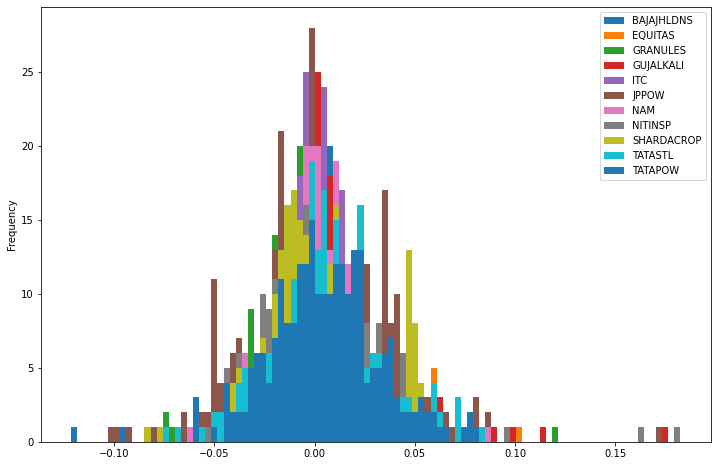

In [17]:
log_ret.plot(kind='hist', bins = 100, figsize = (12,8))

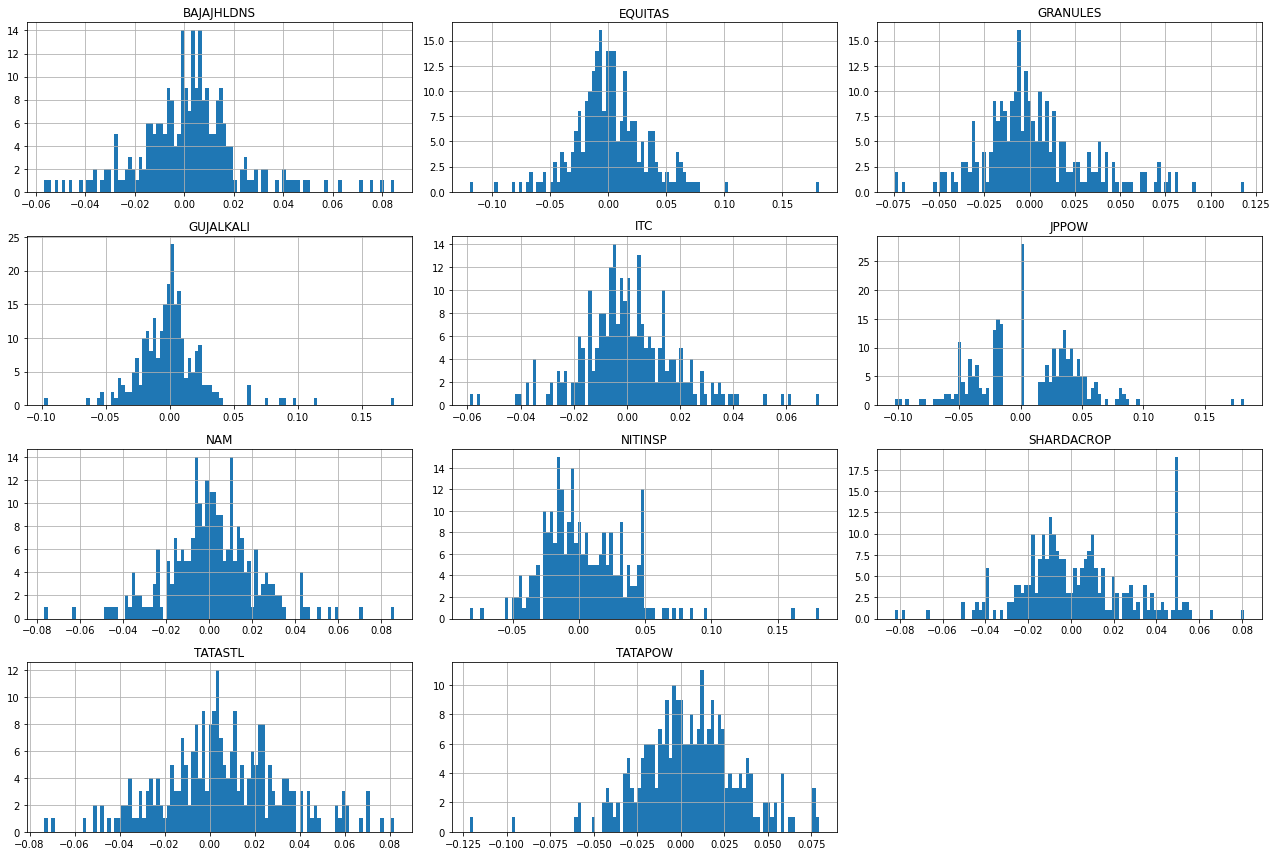

In [18]:
log_ret.hist(bins = 100, figsize = (18,12))
plt.tight_layout()

# Used Random Weights

In [19]:
np.random.seed(101)
weights = np.random.random(11)
bal_wt = weights/np.sum(weights)

In [20]:
exp_ret = np.dot(bal_wt, log_ret.mean()*252)
exp_vol = np.sqrt(np.dot(np.dot(log_ret.cov(), bal_wt)*252, bal_wt))
sharpe_ratio = exp_ret/exp_vol
print('Balanced Weights:', bal_wt)
print('Expected Returns:', exp_ret)
print('Expected Volatility', exp_vol)
print('Sharpe Ratio',sharpe_ratio)

Balanced Weights: [0.09436203 0.10427865 0.00520312 0.03134232 0.12522134 0.15237879
 0.05609224 0.1632908  0.13184842 0.03470773 0.10127455]
Expected Returns: 0.8218777832044153
Expected Volatility 0.2574750066235428
Sharpe Ratio 3.192068208803243


# Used random weights in loop

In [21]:
np.random.seed(105)
no_port = 25000
wt = np.zeros((no_port, len(df.columns)))
ret_arr = np.zeros(no_port)
vol_arr = np.zeros(no_port)
shape_ratio = np.zeros(no_port)
for i in range(no_port):
    weights = np.random.random(len(df.columns))
    weights = weights/np.sum(weights)
    wt[i, :] = weights
    ret_arr[i] = np.dot(weights, log_ret.mean()*252)
    vol_arr[i] = np.dot(np.dot(weights, log_ret.cov())*252, weights)
    shape_ratio[i] = ret_arr[i]/vol_arr[i]

In [22]:
shape_ratio.max()

16.014768862163507

In [23]:
rn = shape_ratio.argmax()

In [24]:
wt[1631,:]

array([0.11329464, 0.00196047, 0.16594489, 0.06145415, 0.15094316,
       0.09146452, 0.01961061, 0.1012513 , 0.0874605 , 0.15739422,
       0.04922153])

In [25]:
rand_portf = pd.DataFrame()
rand_portf['Equities'] = df.columns
rand_portf['Weights'] = wt[rn,:]
rand_portf['Amount inflow'] = rand_portf['Weights']*311930.55

In [26]:
rand_portf

,Equities,Weights,Amount inflow
0,BAJAJHLDNS,0.113295,35340.057846
1,EQUITAS,0.001960,611.530804
2,GRANULES,0.165945,51763.280220
3,GUJALKALI,0.061454,19169.426801
4,ITC,0.150943,47083.783273
5,JPPOW,0.091465,28530.578714
6,NAM,0.019611,6117.149840
7,NITINSP,0.101251,31583.374532
8,SHARDACROP,0.087461,27281.603097
9,TATASTL,0.157394,49096.065980


In [27]:
ret_arr[1631]

0.8257870910509615

In [28]:
vol_arr[1631]

0.051564096750841414

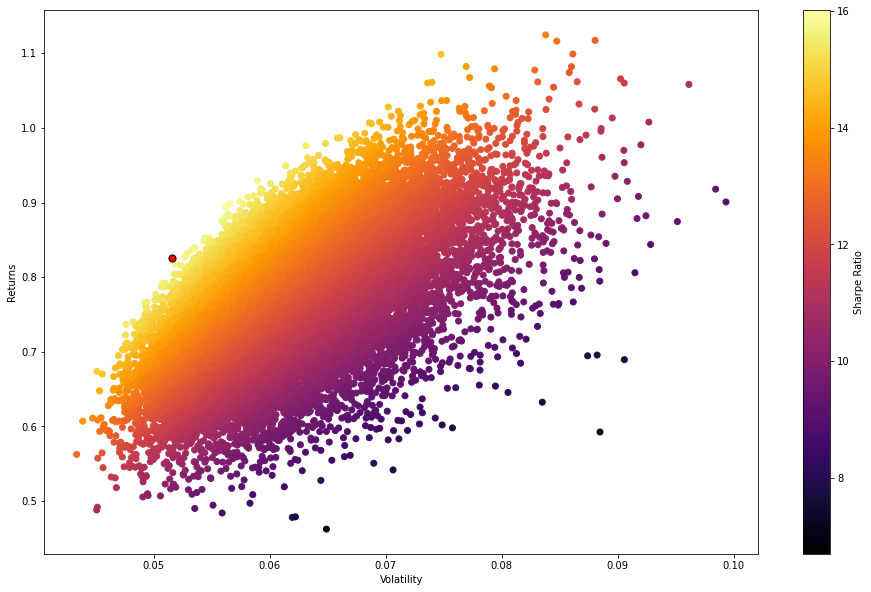

In [29]:
plt.figure(figsize=(16,10))
plt.scatter(vol_arr, ret_arr, c=shape_ratio, cmap = 'inferno')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns')


plt.scatter(vol_arr[1631], ret_arr[1631], c = 'red', s = 50, edgecolors='black')
plt.show()

# Using minimization function

In [30]:
from scipy.optimize import minimize

In [31]:
def ret_vol_sr(weights):
    weights = np.array(weights)
    exp_ret = np.dot(weights, log_ret.mean()*252)
    exp_vol = np.sqrt(np.dot(weights.T, np.dot(weights, log_ret.cov()*252)))
    sr = exp_ret/exp_vol
    return  np.array([exp_ret, exp_vol, sr])

In [32]:
def neg_sr(weights): 
    return ret_vol_sr(weights)[2]*-1

In [33]:
def check_sum(weights):
    return np.sum(weights) - 1

In [67]:
inital_guess = [0.9]*11

In [68]:
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))

In [69]:
cons = ({'type':'eq', 'fun':check_sum})

In [72]:
opt_res = minimize(neg_sr, inital_guess, constraints=cons, method='SLSQP')

In [73]:
opt_res

     fun: -4.63526979265722
     jac: array([ 5.98371029e-04, -4.58657742e-04,  2.36988068e-04, -5.26905060e-05,
       -5.32865524e-04, -3.71396542e-04,  1.63376331e-04, -1.06155872e-04,
       -5.18798828e-04, -4.70399857e-04,  4.39584255e-04])
 message: 'Optimization terminated successfully'
    nfev: 166
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([ 0.26869413, -0.19781434,  0.14075695, -0.14991985, -0.15929565,
        0.22892007, -0.36751823,  0.23308326,  0.0931636 ,  0.61548437,
        0.29444569])

In [74]:
opt_res.x

array([ 0.26869413, -0.19781434,  0.14075695, -0.14991985, -0.15929565,
        0.22892007, -0.36751823,  0.23308326,  0.0931636 ,  0.61548437,
        0.29444569])

In [75]:
ret_vol_sr(opt_res.x)

array([1.87801288, 0.40515719, 4.63526979])

In [41]:
frontier_y = np.linspace(0,0.3,100)

In [42]:
def minimize_volatility(weights):
    return ret_vol_sr(weights)[1]

In [76]:
frontier_volatility = []
for possible_return in frontier_y:
    conss = ({'type':'eq', 'fun':check_sum},
           {'type':'eq', 'fun':lambda w:ret_vol_sr(w)[0] - possible_return})
    result = minimize(minimize_volatility, inital_guess, method = 'SLSQP')
    frontier_volatility.append(result.fun)

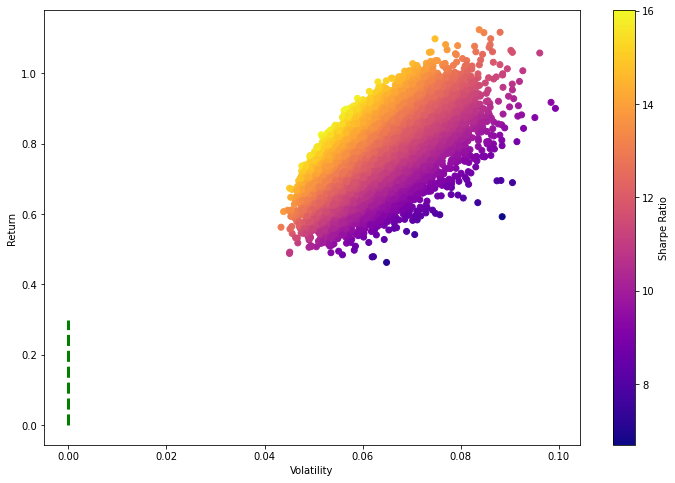

In [77]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=shape_ratio, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_volatility,frontier_y, 'g--', linewidth = 3)
plt.show()